In [22]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


## Business Problem
Based on various attributes of a telephone marketing for asking the bank customers to subscribe for a CD, develop a model to predict whether the customer will subscribe or not based on the various features of the marketing campaign.

## Analysis and preprocessing of the data
Analysis and pre-processing (like encoding) of the data has been done using various techniques and method in pandas

In [9]:
#load data from csv file
df_full = pd.read_csv('/Users/a0122712/learnpy/practice-17.1/bank-full.csv', delimiter=';')
df_full.head()
df=pd.read_csv('/Users/a0122712/learnpy/practice-17.1/bank.csv', delimiter=';')
df.head()

#check for missing values
df_full.isnull().sum()
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:

#check for distribution of categorical variables
print(df_full['job'].value_counts())
print(df_full['marital'].value_counts())
print(df_full['education'].value_counts())
print(df_full['default'].value_counts())
print(df_full['housing'].value_counts())
print(df_full['loan'].value_counts())
print(df_full['contact'].value_counts())
print(df_full['month'].value_counts())
print(df_full['poutcome'].value_counts())
print(df_full['y'].value_counts())



job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: int64
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64
poutcome
unknown    36959
failure     4901
other  

In [11]:
df_full.describe()
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df_full['default'] = df_full['default'].map({'yes': 1, 'no': 0})
df_full['housing'] = df_full['housing'].map({'yes': 1, 'no': 0})
df_full['loan']=df_full['loan'].map({'yes': 1, 'no': 0})
df_full['y']=df_full['y'].map({'yes': 1, 'no': 0})


df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan']=df['loan'].map({'yes': 1, 'no': 0})
df['y']=df['y'].map({'yes': 1, 'no': 0})




<Axes: xlabel='default'>

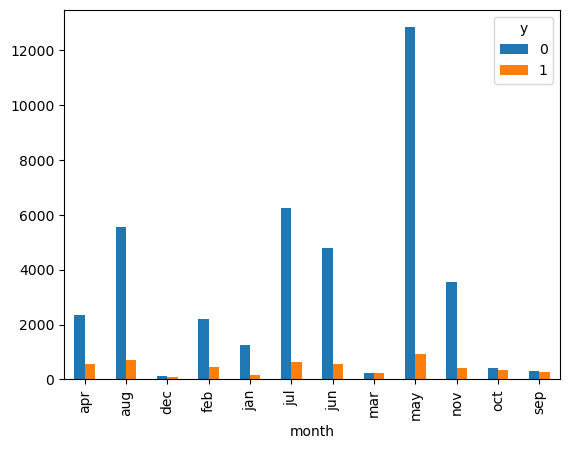

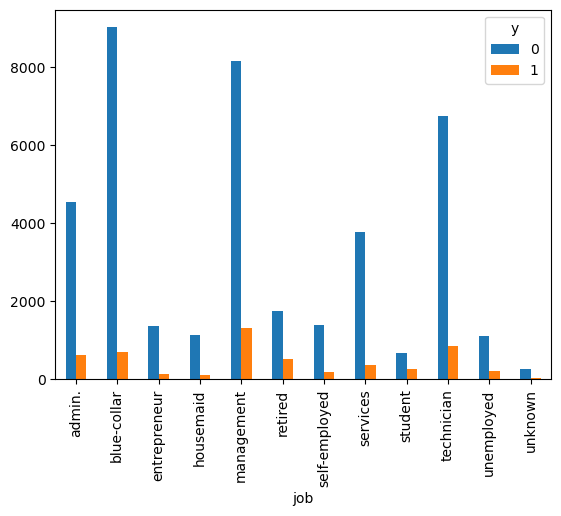

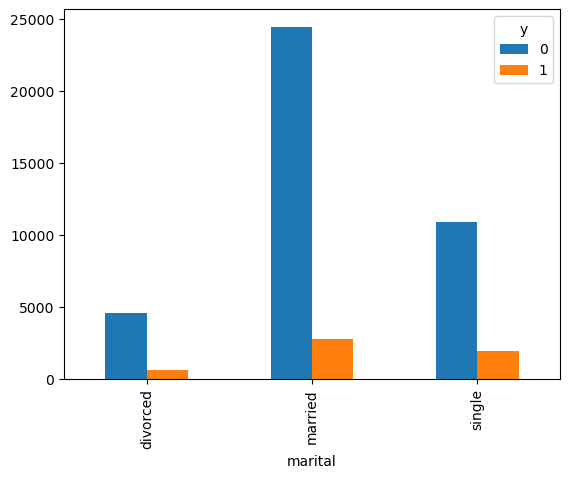

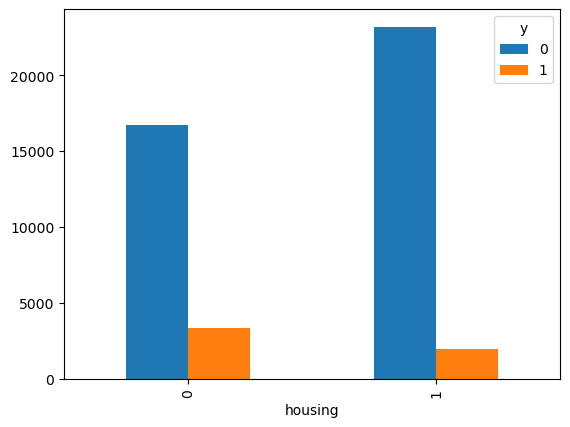

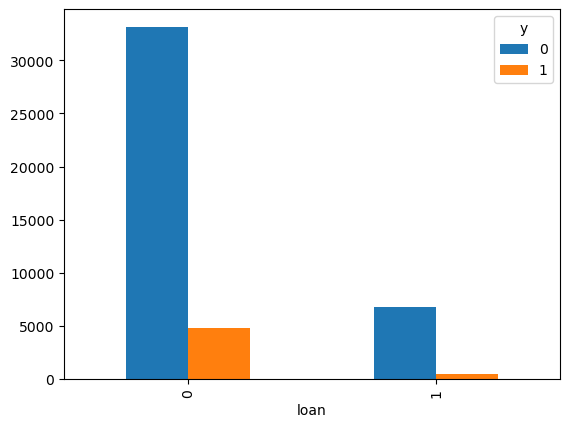

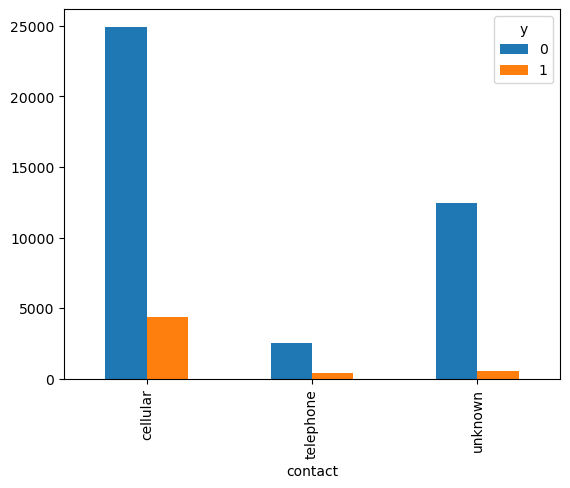

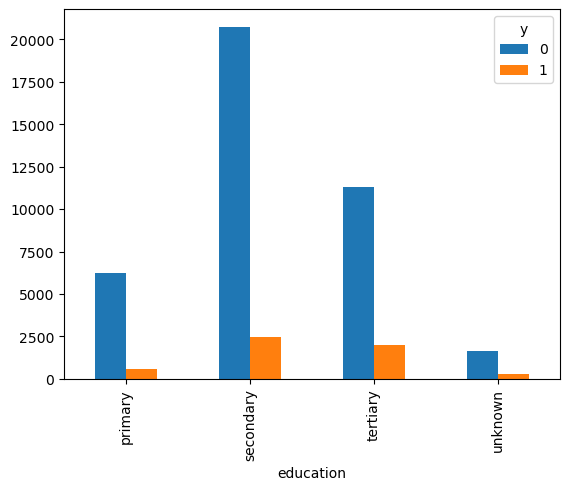

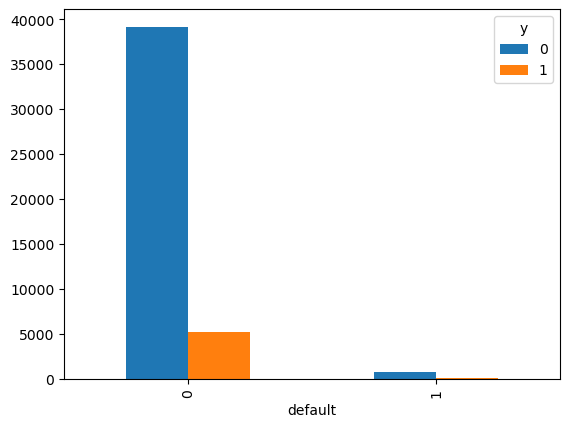

In [13]:
count_by_month = df_full.groupby(['month','y']).size().unstack()
count_by_month.plot(kind='bar')

count_by_job = df_full.groupby(['job','y']).size().unstack()
count_by_job.plot(kind='bar')

count_by_marital = df_full.groupby(['marital','y']).size().unstack()
count_by_marital.plot(kind='bar')

count_by_housing = df_full.groupby(['housing','y']).size().unstack()
count_by_housing.plot(kind='bar')

count_by_loan = df_full.groupby(['loan','y']).size().unstack()
count_by_loan.plot(kind='bar')

count_by_contact = df_full.groupby(['contact','y']).size().unstack()
count_by_contact.plot(kind='bar')

count_by_edu = df_full.groupby(['education','y']).size().unstack()
count_by_edu.plot(kind='bar')

county_by_default = df_full.groupby(['default','y']).size().unstack()
county_by_default.plot(kind='bar')




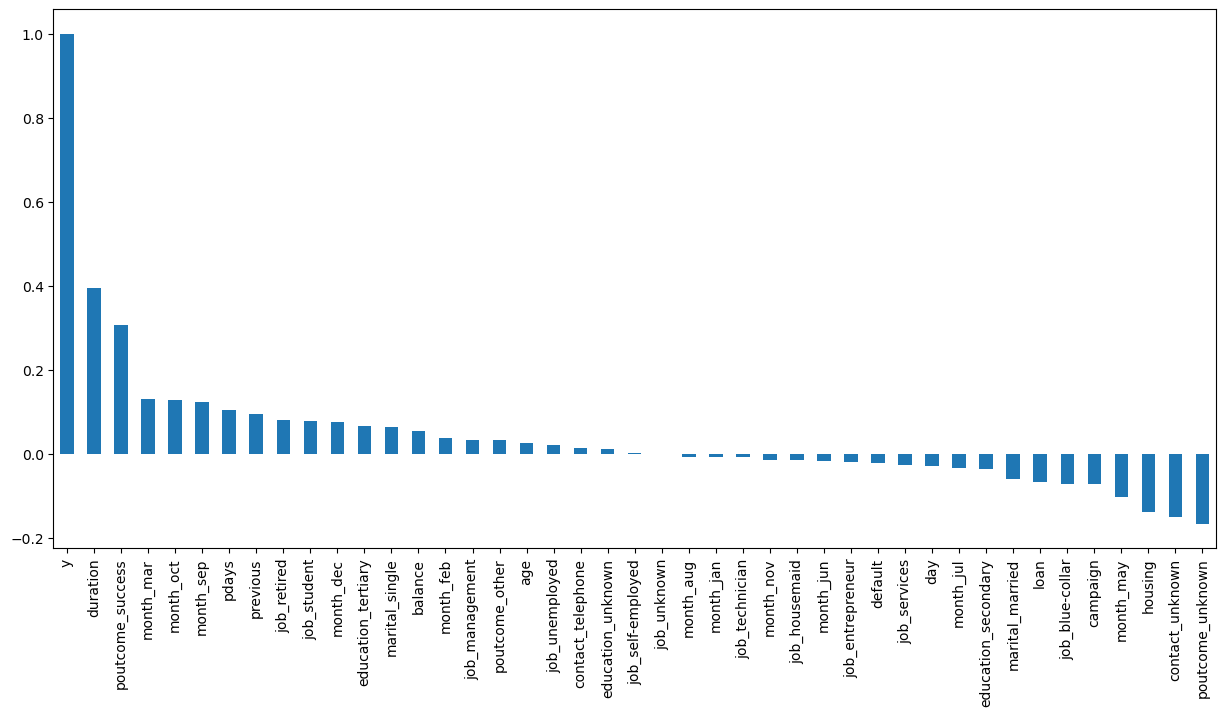

In [14]:

categorical_columns = df_full.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical columns
df_full_encoded = pd.get_dummies(df_full, columns=categorical_columns, drop_first=True)

correlation_matrix = df_full_encoded.corr()
correlation_matrix['y'].sort_values(ascending=False).plot(kind='bar', figsize=(15, 7))

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)



## Inferences from the data
* Duration of the phone call has positive correlation to customer's decision of subscribing/not subscribing for the CD
* Success rate is more during the month of March, Oct and Sep 
* There is a high chance a customer will subscribe if they have been contacted multiple times 
* Retired people and Students have more inclination of subscribing to the CD


## Develop a classification model

In [15]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(df_full_encoded.drop('y', axis=1), df_full_encoded['y'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop('y', axis=1), df_encoded['y'], test_size=0.2, random_state=42)

In [16]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_full,y_train_full)
y_train_pred=knn.predict(X_train_full)
train_as1=accuracy_score(y_train_full,y_train_pred)
y_pred=knn.predict(X_test_full)
test_as1=accuracy_score(y_test_full,y_pred)

In [17]:
train_as1,test_as1

(0.9001880115018801, 0.8806811898706182)

In [18]:
lgr=LogisticRegression(max_iter=10000)
lgr.fit(X_train_full,y_train_full)
y_train_pred=lgr.predict(X_train_full)
train_as1=accuracy_score(y_train_full,y_train_pred)
y_pred=lgr.predict(X_test_full)
test_as1=accuracy_score(y_test_full,y_pred)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
train_as1,test_as1

(0.9026487502764875, 0.8991485126617274)

In [20]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_train_pred=svc.predict(X_train_full)
train_as1=accuracy_score(y_train_full,y_train_pred)
y_pred=svc.predict(X_test_full)
test_as1=accuracy_score(y_test_full,y_pred)

In [21]:
train_as1,test_as1

(0.8891838088918381, 0.8844410040915626)

In [25]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train_full)
train_as1=accuracy_score(y_train_full,y_train_pred)
y_pred=tree.predict(X_test_full)
test_as1=accuracy_score(y_test_full,y_pred)

In [26]:
train_as1,test_as1

(0.8793961512939615, 0.8780272033617162)